In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('hour.csv')

In [3]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
df.shape

(17379, 17)

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Data Pre-Processing

In [8]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [10]:
df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Feature Selection

In [13]:
cor = df.corr()
cor

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


### Remove Less Important columns from data

In [21]:
CorCol = cor[abs(cor['cnt'])>0.4].index
print("Most Correlated Columns are : = \n", CorCol)

Most Correlated Columns are : = 
 Index(['temp', 'atemp', 'casual', 'registered', 'cnt'], dtype='object')


In [22]:
CorCol = cor[abs(cor['cnt'])<=0.4].index
print("Least Correlated Columns are : = \n", CorCol)

Least Correlated Columns are : = 
 Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'hum', 'windspeed'],
      dtype='object')


In [23]:
dataClean= df[['temp', 'atemp', 'casual', 'registered', 'cnt']]

These five are the most correlated column with the threshould 0.2 as compare to all other feature. 

In [24]:
dataClean

,temp,atemp,casual,registered,cnt
0,0.24,0.2879,3,13,16
1,0.22,0.2727,8,32,40
2,0.22,0.2727,5,27,32
3,0.24,0.2879,3,10,13
4,0.24,0.2879,0,1,1
...,...,...,...,...,...
17374,0.26,0.2576,11,108,119
17375,0.26,0.2576,8,81,89
17376,0.26,0.2576,7,83,90
17377,0.26,0.2727,13,48,61


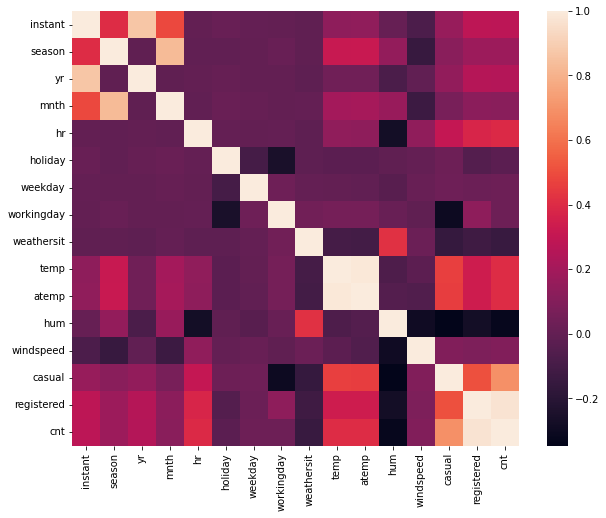

In [20]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr())
plt.show()

## Data Visualization

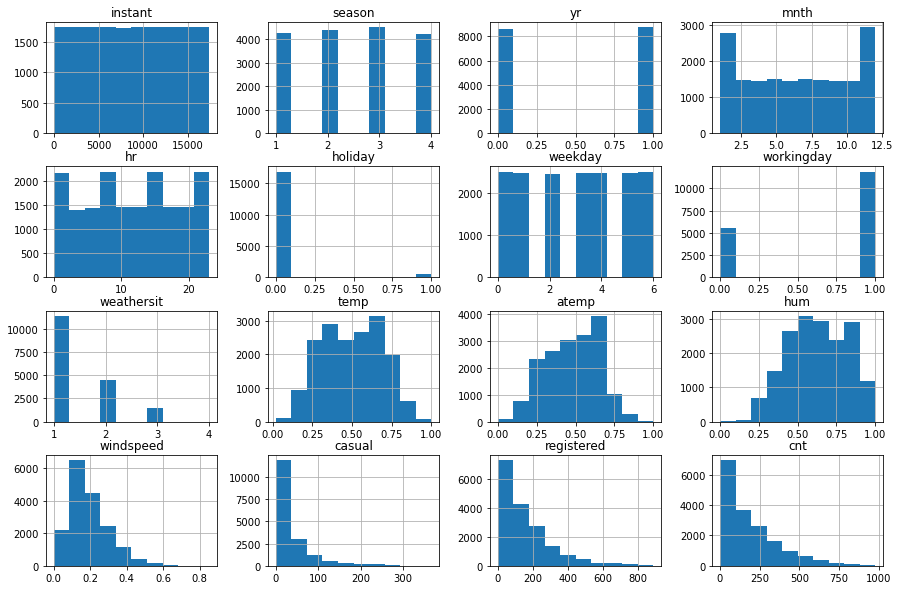

In [21]:
df.hist(figsize = (15,10))
plt.show()

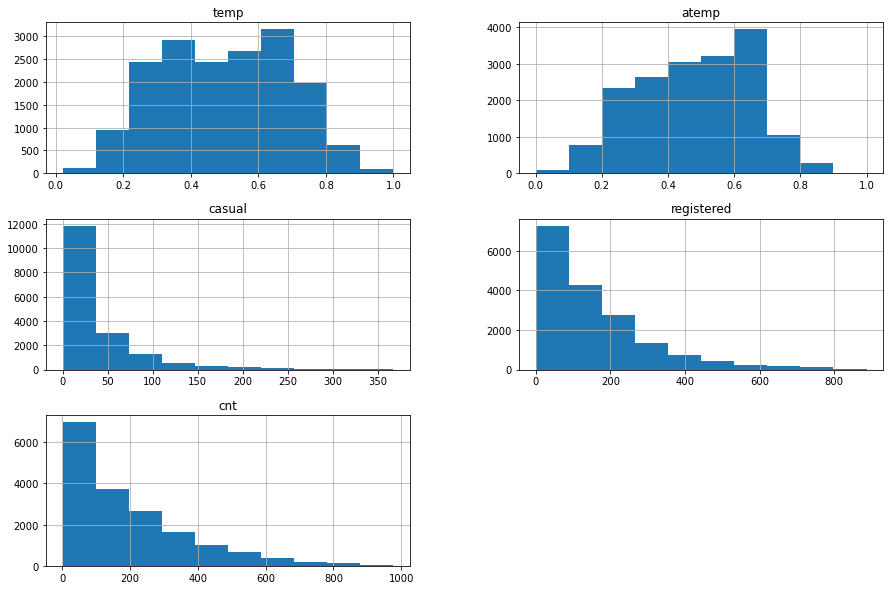

In [22]:
dataClean.hist(figsize = (15,10))
plt.show()

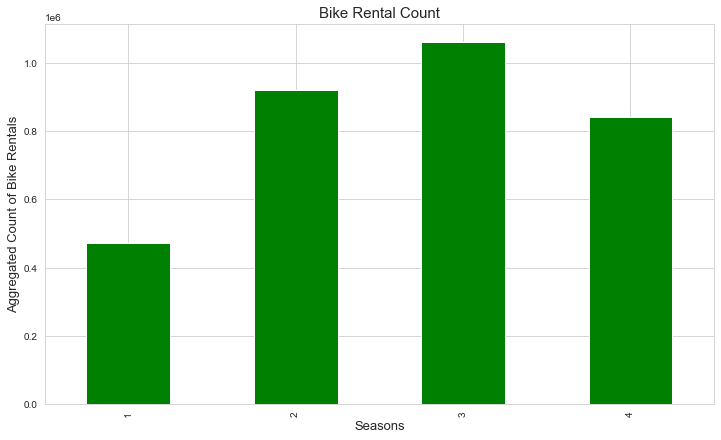

In [23]:
sns.set_style('whitegrid')
df.groupby('season').sum()['cnt'].plot(kind = 'bar', figsize = (12,7), color = 'g',)
plt.title('Bike Rental Count', fontsize = 15)
plt.xlabel('Seasons', fontsize = 13)
plt.ylabel('Aggregated Count of Bike Rentals', fontsize = 13)
plt.show()

### Average Bike Rental Count on Working vs Non Working day

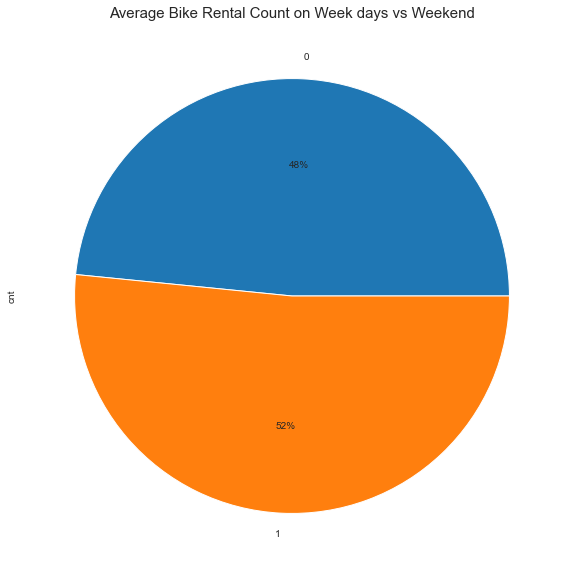

In [24]:
df.groupby('workingday').mean()['cnt'].plot(kind = 'pie', figsize = (12,10),autopct='%.0f%%')
plt.title('Average Bike Rental Count on Week days vs Weekend', fontsize = 15)
plt.show()

### Peak Hours - Workings Days

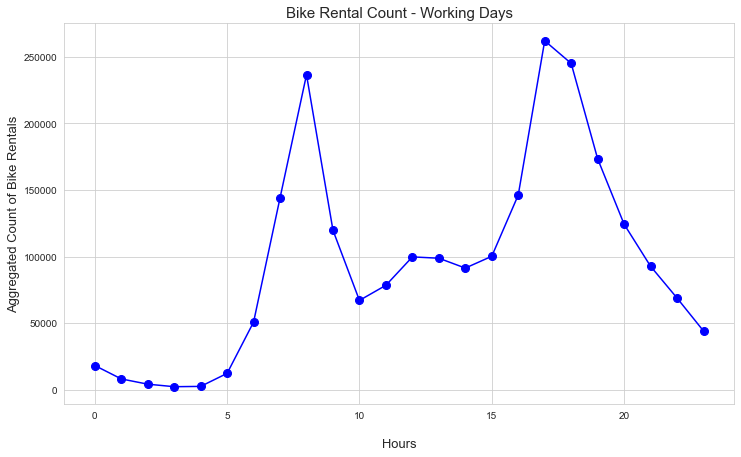

In [26]:
df[df['workingday'] == 1].groupby('hr').sum()['cnt'].plot(kind = 'line', figsize = (12,8), color = 'g', marker = 'o',  markersize = 10)
plt.title('Bike Rental Count (Working Accounts)', fontsize = 14)
plt.xlabel('\nHours', fontsize = 11)
plt.ylabel('Count sum of Bike Rentals', fontsize = 13)
plt.show()

### Peak Hours - NonWorkings Days

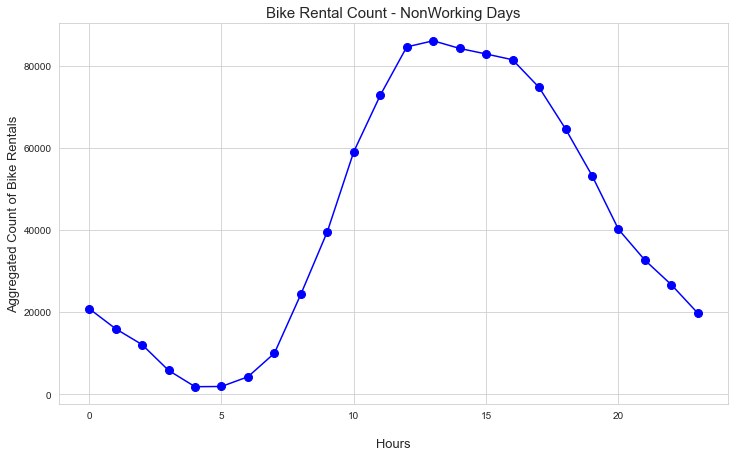

In [27]:
df[df['workingday'] == 0].groupby('hr').sum()['cnt'].plot(figsize = (12,7), color = 'blue', marker = 'o', 
                                                                 markersize = 8)
plt.title('Bike Rental Count (NonWorking Days)', fontsize = 14)
plt.xlabel('\nHours', fontsize = 12)
plt.ylabel('Count Sum of Bike Rentals', fontsize = 13)
plt.show()

### Machine Learning

In [28]:
x = dataClean.drop('cnt', axis = 1)
y = dataClean['cnt']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [30]:
print('The shape of training features is:', X_train.shape)
print('The shape of testing features is:', X_test.shape)

The shape of training features is: (13903, 4)
The shape of testing features is: (3476, 4)


## Decision Tree

In [31]:
#Fitting the Decision Tree Regressor
decisionTreeRegressor = tree.DecisionTreeRegressor(random_state = 0)
decisionTreeRegressor.fit(X_train, y_train)

# Predicting on the test dataset using the trained model
y_pred = decisionTreeRegressor.predict(X_test)

In [32]:
y_pred

array([376., 127.,  24., ..., 172.,  15., 495.])

#### Decision Tree Hyperparameter Tuning

In [37]:
# Create a dictionary of different hyperparameters
hyperparameters = {'max_depth': [2, 3, 5, 10],
                   'min_samples_leaf': [1, 3, 5, 7, 9],
                   'splitter': ['best','random']}

# Use GridSearchCV so that it can iterate through different hyperparameters and finds the best ones having the best score
tuned_decisionTreeRegressor = GridSearchCV(decisionTreeRegressor, param_grid = hyperparameters,
                                           scoring = 'neg_mean_squared_error', cv = 3, verbose = 3)

# Fitting the Decision Tree Regressor
tuned_DTR = tuned_decisionTreeRegressor.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3] END max_depth=2, min_samples_leaf=1, splitter=best;, score=-4524.452 total time=   0.0s
[CV 2/3] END max_depth=2, min_samples_leaf=1, splitter=best;, score=-4530.064 total time=   0.0s
[CV 3/3] END max_depth=2, min_samples_leaf=1, splitter=best;, score=-4410.533 total time=   0.0s
[CV 1/3] END max_depth=2, min_samples_leaf=1, splitter=random;, score=-11139.051 total time=   0.0s
[CV 2/3] END max_depth=2, min_samples_leaf=1, splitter=random;, score=-10245.567 total time=   0.0s
[CV 3/3] END max_depth=2, min_samples_leaf=1, splitter=random;, score=-10303.207 total time=   0.0s
[CV 1/3] END max_depth=2, min_samples_leaf=3, splitter=best;, score=-4524.452 total time=   0.0s
[CV 2/3] END max_depth=2, min_samples_leaf=3, splitter=best;, score=-4530.064 total time=   0.0s
[CV 3/3] END max_depth=2, min_samples_leaf=3, splitter=best;, score=-4410.533 total time=   0.0s
[CV 1/3] END max_depth=2, min_samples_leaf=3, splitter=r

[CV 1/3] END max_depth=5, min_samples_leaf=9, splitter=random;, score=-2696.415 total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=9, splitter=random;, score=-3407.685 total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=9, splitter=random;, score=-2249.565 total time=   0.0s
[CV 1/3] END max_depth=10, min_samples_leaf=1, splitter=best;, score=-31.675 total time=   0.0s
[CV 2/3] END max_depth=10, min_samples_leaf=1, splitter=best;, score=-37.471 total time=   0.0s
[CV 3/3] END max_depth=10, min_samples_leaf=1, splitter=best;, score=-30.603 total time=   0.0s
[CV 1/3] END max_depth=10, min_samples_leaf=1, splitter=random;, score=-149.781 total time=   0.0s
[CV 2/3] END max_depth=10, min_samples_leaf=1, splitter=random;, score=-177.133 total time=   0.0s
[CV 3/3] END max_depth=10, min_samples_leaf=1, splitter=random;, score=-249.087 total time=   0.0s
[CV 1/3] END max_depth=10, min_samples_leaf=3, splitter=best;, score=-32.614 total time=   0.0s
[CV 2/3] END max_depth

In [38]:
print('Best hyperparameter for Decision Tree are \n', tuned_DTR.best_estimator_.get_params())

tuned_pred = tuned_DTR.predict(X_test)

The best hyperparameters for Decision Trees are:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


### Model Evaluation

In [41]:
MeanAbsoluteError = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :', round(MeanAbsoluteError, 3))
MeanSquareError = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error :', round(MeanSquareError, 3))
RootMeanSquareError = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', round(RootMeanSquareError, 3))

print('\nAfter Hyperparameter Tuning:')

mae = metrics.mean_absolute_error(y_test, tuned_pred)
print('Mean Absolute Error :', round(mae, 4))
mse = metrics.mean_squared_error(y_test, tuned_pred)
print('Mean Squared Error :', round(mse, 4))
rmse = np.sqrt(metrics.mean_squared_error(y_test, tuned_pred))
print('Root Mean Squared Error :', round(rmse, 4))

Mean Absolute Error : 80.535
Mean Squared Error : 20519.821
Root Mean Squared Error : 143.247

After Hyperparameter Tuning:
Mean Absolute Error : 3.1799
Mean Squared Error : 31.1866
Root Mean Squared Error : 5.5845


## Logistic Regression

In [43]:
LogRegressor = LogisticRegression()
LogRegressor.fit(X_train, y_train)

y_pred = LogRegressor.predict(X_test)

### Logistic Hyperparameter Tuning

In [44]:
# Hyperparameter dictionary for using in hyperparameter tunning.  
Hyper = {'penalty' : ['l1', 'l2'],
                   'C' : np.logspace(-4, 1, 10),
                   'solver' : ['liblinear']}


# GridSeachCV will iterate and search for best hyperparameter with better score.
Tuned_Log_Regress = GridSearchCV(LogRegressor, param_grid = Hyper,
                                           scoring = 'neg_mean_squared_error', cv = 3, verbose = 3)

# Fitting the Decision Tree Regressor
Tuned_Log_Regression = Tuned_Log_Regress.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=0.0001, penalty=l1, solver=liblinear;, score=-44998.456 total time=   4.7s
[CV 2/3] END C=0.0001, penalty=l1, solver=liblinear;, score=-51804.555 total time=   4.6s
[CV 3/3] END C=0.0001, penalty=l1, solver=liblinear;, score=-33996.790 total time=   4.5s
[CV 1/3] END C=0.0001, penalty=l2, solver=liblinear;, score=-48940.143 total time=   8.3s
[CV 2/3] END C=0.0001, penalty=l2, solver=liblinear;, score=-51525.896 total time=   8.1s
[CV 3/3] END C=0.0001, penalty=l2, solver=liblinear;, score=-42176.495 total time=   8.5s
[CV 1/3] END C=0.00035938136638046257, penalty=l1, solver=liblinear;, score=-44998.456 total time=   5.2s
[CV 2/3] END C=0.00035938136638046257, penalty=l1, solver=liblinear;, score=-51804.555 total time=   5.5s
[CV 3/3] END C=0.00035938136638046257, penalty=l1, solver=liblinear;, score=-33996.790 total time=   5.3s
[CV 1/3] END C=0.00035938136638046257, penalty=l2, solver=liblinear;, score=-5221

In [47]:
print('The Best hyperparameter are:\n', tuned_DTR.best_estimator_.get_params())

# Predicting on the test dataset using the hyperparamter-tuned trained model
tuned_pred = Tuned_Log_Regression.predict(X_test)

The Best hyperparameter are:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


In [48]:
MeanAbsoluteError = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error is :', round(MeanAbsoluteError, 3))
MeanSquareError = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', round(MeanSquareError, 3))
RootMeanSquareError = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error is:', round(RootMeanSquareError, 3))
print()

print('After Hyperparameter Tuning:')
MeanAbsoluteError = metrics.mean_absolute_error(y_test, tuned_pred)
print('Mean Absolute Error :', round(MeanAbsoluteError, 3))
MeanSquareError = metrics.mean_squared_error(y_test, tuned_pred)
print('Mean Squared Error :', round(MeanSquareError, 3))
RootMeanSquareError = np.sqrt(metrics.mean_squared_error(y_test, tuned_pred))
print('Root Mean Squared Error :', round(RootMeanSquareError, 4))

Mean Absolute Error is : 80.535
Mean Squared Error is: 20519.821
Root Mean Squared Error is: 143.247

After Hyperparameter Tuning:
Mean Absolute Error : 54.432
Mean Squared Error : 7227.434
Root Mean Squared Error : 85.0143
